Importamos las herramientas con que vamos a trabajar

In [1]:
import numpy as np 
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import chardet

Vamos a relevar la codificación que tiene el archivo

In [2]:
def get_encoding_type(csv_path):
    rawdata = open(csv_path, 'rb').read()
    result = chardet.detect(rawdata)
    return result.get('encoding')


In [3]:
#data_location = "C:/Users/Administrador.000/Documents/DH/Contenidook/ds_blend_students_2020/Properati/properati.csv"
data_location = "../data/properati.csv"
data_orig = pd.read_csv(data_location, sep = ",",encoding='utf_8')
print(data_orig.shape)
data_orig.dtypes

(121220, 26)


Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

## Evalúo registros duplicados

Veamos si existen registros duplicados en el `DataFrame` data considerando sólo las columnas **"property_type"**, **"place_name"**, **"price"**, **"currency"**, **"surface_total_in_m2"**, **"surface_covered_in_m2"**, marcando como no duplicado la primera ocurrencia de un registro.

NOTA: Se desprecia la columna **"description"**, siendo que aún se encuentran duplicados al tener en cuenta dicha olumna.

In [4]:
# subset que utilizaré para eliminar registros duplicados
subset = ["property_type","place_name","price","currency","surface_total_in_m2","surface_covered_in_m2"]
mask_duplicated = data_orig.duplicated(subset, keep = 'first')

# subset considerando "description":
subset = ["property_type","place_name","price","currency","surface_total_in_m2","surface_covered_in_m2","description"]
mask_duplicated_with_description = data_orig.duplicated(subset, keep = 'first')


print('Cantidad de registros duplicados: '+str(mask_duplicated.sum()))
print('Cantidad de registros duplicados considerando" description": '+str(mask_duplicated_with_description.sum()))

duplicated_records = data_orig.loc[mask_duplicated]
duplicated_records.head(3).sort_values(by = 'place_name')

Cantidad de registros duplicados: 22432
Cantidad de registros duplicados considerando" description": 6555


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
84,84,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9327656,-60.6533854",-32.932766,...,55.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/15bz0_venta_depart...,Departamento en PB con cocina comedor separado...,2 Dormitorios. Güemes al 2400,https://thumbs4.properati.com/3/p47wDv3RcA2Ppe...
101,101,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9359588621,-60.6691426017",-32.935959,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15d1n_venta_depart...,Tucuman 3476Edificio PB y 4 pisos por ascensor...,Rosario - Tucuman 3400 - Venta Dptos 1 Dormito...,https://thumbs4.properati.com/1/2fJFWvaIJhJiM2...
102,102,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9359588621,-60.6691426017",-32.935959,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15d1o_venta_depart...,Tucuman 3476Edificio PB y 4 pisos por ascensor...,Rosario - Tucuman 3400 - Venta Dptos 2 Dormito...,https://thumbs4.properati.com/3/Ugx8LRGzX9jj-U...


**OMITO LA ELIMINACIÓN DE REGISTROS "DUPLICADOS"**

Esto lo hablé con Fabían y acordamos que no es prudente eliminarlos, dado que es difícil encontrar un criterio que garantice la existencia de los duplicados.
Lo veremos más adelante en los gráficos.

In [5]:
# Omito la eliminación de "supuestos duplicados":
#data_nodup = data_orig.drop_duplicates(subset, keep = "first")

data_nodup = data_orig

print(data_orig.shape)
print(data_nodup.shape)

# Vemos que no quedan registros duplicados para el subset definido 
#dup_mask = data_nodup.duplicated(subset, keep = "first")
#any(dup_mask)

(121220, 26)
(121220, 26)


## Análisis de la información - Desestimación de datos

Veamos la cantidad de nulos que hay en mi `DataFrame` original

In [6]:
data_orig.isnull().sum()/data_orig.shape[0]

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail          

In [7]:
print(data_nodup.shape)
data_nodup.head(3)

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


## Análisis para eliminar registros 

Veamos los registros que no que no tienen moneda en AR o US$

In [8]:
data_nodup.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Veo qué pasa con **PEN**.
Se dropea?

In [9]:
mask_PEN = data_nodup.currency == 'PEN'
print('Precios de PEN:\n'+str(data_nodup.loc[mask_PEN].price))
data_nodup.loc[mask_PEN]

Precios de PEN:
50387    380000.0
50388    950000.0
Name: price, dtype: float64


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
50387,50387,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e8z_venta_depart...,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/9/N_Qr_5X_vOq--b...
50388,50388,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e90_venta_depart...,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/8/_cBXAyr_9pDySg...


Veo qué pasa con **UYU**.
Se dropea?

In [10]:
mask_UYU = data_nodup.currency == 'UYU'
print('Precios de UYU:\n'+str(data_nodup.loc[mask_UYU].price))
data_nodup.loc[mask_UYU]

Precios de UYU:
107390    650000000.0
Name: price, dtype: float64


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
107390,107390,sell,house,San Roque,|Argentina|Mendoza|San Roque|,Argentina,Mendoza,3836586.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1by0s_venta_casa_s...,"Casa con Calefacción central, Mendoza, San Roq...",Casa - San Vicente,https://thumbs4.properati.com/2/pA0RbuDKRK6GgV...


Elimino los registros que no tienen moneda en AR o US$

In [11]:
mask_AR_US = np.logical_or(data_nodup.currency == 'UYU', data_nodup.currency == 'PEN') 
print('Cantidad de elementos a eliminar: ', str(mask_AR_US.sum()))

# Identifico los índices que voy a eliminar
inds = data_nodup.loc[mask_AR_US].index
inds

Cantidad de elementos a eliminar:  3


Int64Index([50387, 50388, 107390], dtype='int64')

In [12]:
data_nodup_dropped = data_nodup.drop(index = inds)
print("Filas en Registros limpios: "+str(data_nodup_dropped.shape[0]))
print("Filas en Registros anterior: "+str(data_nodup.shape[0]))
data_nodup_dropped.head()

Filas en Registros limpios: 121217
Filas en Registros anterior: 121220


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


Armo un `DataFrama` **data** quedándome con las columnas de interés.

In [13]:
subset = ['Unnamed: 0','operation','country_name','geonames_id','lat-lon','lat','lon','floor','expenses','properati_url','image_thumbnail']

data = data_nodup_dropped.drop(subset, axis = 1)
print(data.shape)
data.sample(3)

(121217, 15)


,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
72282,PH,Flores,|Argentina|Capital Federal|Flores|,Capital Federal,259000.0,USD,4569925.5,259000.0,NaN,NaN,NaN,NaN,NaN,EXCELENTE PROPIEDAD TIPO CASA CON ENTRADA INDE...,PH - Flores
24787,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Bs.As. G.B.A. Zona Norte,180000.0,USD,3176010.0,180000.0,NaN,72.0,NaN,2500.000000,NaN,EXCLUSIVIDAD!!! DEPTO IMPECABLE CON HERMOSAS V...,"Departamento con Dependencias, Bs.As. G.B.A. Z..."
16111,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,80000.0,USD,1411560.0,80000.0,31.0,26.0,2580.645161,3076.923077,NaN,Ubicado en la esquina de Pueyrredón y San Juan...,Dto. Mono ambiente - Esdudio Pueyrredón 1100


## Análisis de precios

Veamos cuestiones referido a los precios en AR o US$.

Lo primero para analizar es la tasa de conversión entre pesos y dólares, la cual viene dada por el factor de conversión 17.6445, no importa si el precio se define en $AR o USD. Con este argumento podrían eliminar algunos datos.

In [14]:
# tasa de conversión
serie_price_aprox_local_currency = data.price_aprox_local_currency
serie_price_aprox_usd = data.price_aprox_usd

tasa_conversion = (serie_price_aprox_local_currency/serie_price_aprox_usd).round(4)
tasa_conversion.value_counts()

17.6445    100806
dtype: int64

In [15]:
# Me fijo inconsistencia en los precios en AR y US$
mask_prices = data.price_aprox_usd >= data.price_aprox_local_currency
print("Cantidad de inconsistencias: ", mask_prices.sum())
data.loc[mask_prices]

Cantidad de inconsistencias:  1


,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
9761,house,Córdoba,|Argentina|Córdoba|,Córdoba,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0,Casa en Venta de 2 dorm. en Armenia,SE VENDE CASA EN EL BARRIO EL LIMONAR


In [16]:
#Veo si hay algún dato rescatable
print(data.loc[mask_prices].title)
print(data.loc[mask_prices].description)

9761    SE VENDE CASA EN EL BARRIO EL LIMONAR
Name: title, dtype: object
9761    Casa en Venta de 2 dorm. en Armenia
Name: description, dtype: object


Dado que este registro tiene los datos de interés en **NaN** y no se puede extraer información de otros registros, decido eliminarlo.

In [17]:
ind_prices = data.loc[mask_prices].index

# Elimino el registro
data = data.drop(index = ind_prices)
data.shape

(121216, 15)

Veo si **NO** tiene definido el precio pero **SÍ** el precio/m2.

Vemos que **NO** se da el caso.

In [18]:
mask_prices = np.logical_and(data.price.isnull(), data.price_usd_per_m2.notnull())
mask_prices.sum()

0

In [19]:
data.head(2)

,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...


In [20]:
# Evalúo para USD
mask_usd = data.currency == 'USD'
print(mask_usd.sum())
mask_prices_usd = data.loc[mask_usd].price.round(2) == data.loc[mask_usd].price_aprox_usd.round(2)
print(mask_prices_usd.sum())

87587
87587


Vemos que coincide la columna **price** con **price_aprox_usd** cuando **currency** es USD.

Veamos qué sucede cuando **price** es ARS:

In [21]:
# Evalúo para ARS
mask_ars = data.currency == 'ARS'
print(mask_ars.sum())
mask_prices_ars = data.loc[mask_ars].price.round(2) == data.loc[mask_ars].price_aprox_local_currency.round(2)
print(mask_prices_ars.sum())
data.loc[mask_ars].head()

13219
0


,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
9,house,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO
32,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,550000.0,ARS,544262.59,30846.02,50.0,50.0,616.920400,11000.000000,3.0,"EN VENTA, departamento ubicado en barrio Pueyr...",Departamento apto crédito! Barrio Pueyrredon
37,house,Malagueño,|Argentina|Córdoba|Malagueño|,Córdoba,1250000.0,ARS,1236960.43,70104.59,75.0,75.0,934.727867,16666.666667,NaN,Nuevos ingreso:-VENTA-Villa San Nicolas.Presen...,Casa Venta Villa San Nicolas
78,house,Posadas,|Argentina|Misiones|Posadas|,Misiones,5500000.0,ARS,5442626.35,308460.22,261.0,18615.0,1181.839923,295.460650,5.0,"S/AVDA COSTANERA , NUEVA ZONA GASTRONOMICA...",Oportunidad! Casa zona Bahía el Brete
97,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,Capital Federal,1423800.0,ARS,1408947.37,79851.93,NaN,NaN,NaN,NaN,1.0,Torre de 15 pisos con amenities ubicados en el...,VIVÍ CERCA DE TODO Av. 9 de Julio


Cómo vemos que **price** en ARS no cinciden, veamos si tienen relación con **price_aprox_usd**:

In [22]:
# tasa de conversión
serie_price_ARS = data[mask_ars].price
serie_price_aprox_usd = data[mask_ars].price_aprox_usd

tasa_conversion = (serie_price_ARS/serie_price_aprox_usd).round(4)
tasa_conversion.value_counts()

17.8305    12857
17.1430      290
17.6340       54
17.7980        6
17.2040        4
17.5025        3
17.4040        2
17.4265        1
17.4670        1
17.4050        1
dtype: int64

Como vemos que predomina la tasa de cambio de 17.8305 entre el **price** en ARS y el **price_aprox_usd**, vamos a utilizar esta tasa para redefinir los precios en US$.

Vamos a definir una nueva columna **"price_USD"** y va a contener:
- Los valores de price cuando currency sea USD
- Los valores de price modificados por la tasa de cambio de 17.8305 cuando currency sea ARS

In [23]:
data.loc[mask_usd,"price_USD"] = (data.loc[mask_usd,"price"]).round(0)
data.loc[mask_ars,"price_USD"] = (data.loc[mask_ars,"price"]/17.8305).round(0)

print("Cantidad de nulls en columna price_USD: ",data["price_USD"].isnull().sum())
print("Cantidad de nulls en columna price: ",data["price_USD"].isnull().sum())

Cantidad de nulls en columna price_USD:  20410
Cantidad de nulls en columna price:  20410


A partir de aquí sabemos que podemos eliminar las columnas **price**, **currency**, **price_aprox_local_currency**, **price_aprox_usd**, pero vamos a dejarlo para después porque podemos llegar a necesitarlas en el análisis de las superficies y precio/superficie.

## Análisis de Superficies

Veamos cuestiones relacionadas a los campos "surface_total_in_m2" y "surface_covered_in_m2".
VAmos a tratar de limpiar, emprolijar y reconstruir estos campos.

In [24]:
data.isnull().sum()/data.shape[0]

property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
state_name                    0.000000
price                         0.168377
currency                      0.168377
price_aprox_local_currency    0.168377
price_aprox_usd               0.168377
surface_total_in_m2           0.324413
surface_covered_in_m2         0.164194
price_usd_per_m2              0.433928
price_per_m2                  0.276845
rooms                         0.609053
description                   0.000016
title                         0.000000
price_USD                     0.168377
dtype: float64

In [25]:
# Acá me aseguro que ninguno de los dos campos tengan nulls:
mask_size_right_surfaces = data.surface_total_in_m2 >= data.surface_covered_in_m2
print('Cantidad de registros coherentes: ' + str(mask_size_right_surfaces.sum()))
data.loc[mask_size_right_surfaces].head(2)

Cantidad de registros coherentes: 73248


,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,72000.0


In [26]:
# Agrego los datos verificados en nuevas columnas:
data.loc[mask_size_right_surfaces,'superficie_TOTAL'] = data.loc[mask_size_right_surfaces,'surface_total_in_m2']
data.loc[mask_size_right_surfaces,'superficie_CUBIERTA'] = data.loc[mask_size_right_surfaces,'surface_covered_in_m2']
data.head(1)

,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,55.0,40.0


In [27]:
# Vamos a calcular la media y desvío estándar de la diferencia entre ambas sups:
resta_sups_right = (data.loc[mask_size_right_surfaces].surface_total_in_m2 - data.loc[mask_size_right_surfaces].surface_covered_in_m2)
mean_surfaces_right = resta_sups_right.mean().round(2)
stdv_surfaces_right = resta_sups_right.std().round(2)

print('MEAN de la diferencia de superficies: '+str(mean_surfaces_right))
print('STD de la diferencia de superficies: '+str(stdv_surfaces_right))

MEAN de la diferencia de superficies: 113.18
STD de la diferencia de superficies: 1653.62


In [28]:
#from bokeh.plotting import figure, output_notebook, show
#from bokeh.models import HoverTool

#p = figure(plot_width=600, plot_height=400)
#p.circle(x=resta_sups_right.index, y=resta_sups_right.values, size=8)

#hover = HoverTool(tooltips=[("index", "$index"), ("(x,y)", "($x, $y)")])

#p.add_tools(hover)
#output_notebook()
#show(p)

In [29]:
#data.loc[mask_size_right_surfaces].iloc[5975]

Veamos cuando solo tenemos una de las dos superficies definidas:

In [30]:
mask_surface_total_in_m2_nulls = data.surface_total_in_m2.isnull()
mask_surface_covered_in_m2_nulls = data.surface_covered_in_m2.isnull()

In [31]:
# Tengo TOTAL pero no tengo CUBIERTA
mask_surface_total = np.logical_and(np.logical_not(mask_surface_total_in_m2_nulls),mask_surface_covered_in_m2_nulls)
print('Cantidad de casos: ' + str(mask_surface_total.sum()))
data.loc[mask_surface_total,'superficie_TOTAL'] = data.loc[mask_surface_total,'surface_total_in_m2']
data.loc[mask_surface_total].head(1)

Cantidad de casos: 7538


,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
5,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Entre Ríos,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",NaN,53.0,NaN


In [32]:
# Tengo CUBIERTA pero no tengo TOTAL
mask_surface_covered = np.logical_and(mask_surface_total_in_m2_nulls,np.logical_not(mask_surface_covered_in_m2_nulls))
print('Cantidad de casos: ' + str(mask_surface_covered.sum()))
data.loc[mask_surface_covered,'superficie_CUBIERTA'] = data.loc[mask_surface_covered,'surface_covered_in_m2']
data.loc[mask_surface_covered].head(1)

Cantidad de casos: 26959


,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
68,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,235000.0,USD,4146457.5,235000.0,NaN,72.0,NaN,3263.888889,2.0,"Cocina integrada con barra , horno y anafe .T...",EXCELENTE DEPARTAMENTO CON VISTA AL MAR Y AL GOLF,235000.0,NaN,72.0


## Veamos qué pasa con los casos donde la sup cubierta es mayor que sup total:

In [33]:
mask_size_surfaces = data.surface_total_in_m2 < data.surface_covered_in_m2
print('Cantidad de inconsistencias en superficie: ' + str(mask_size_surfaces.sum()))
data.loc[mask_size_surfaces].head(2)

Cantidad de inconsistencias en superficie: 1106


,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
78,house,Posadas,|Argentina|Misiones|Posadas|,Misiones,5500000.0,ARS,5442626.35,308460.22,261.0,18615.0,1181.839923,295.460650,5.0,"S/AVDA COSTANERA , NUEVA ZONA GASTRONOMICA...",Oportunidad! Casa zona Bahía el Brete,308460.0,NaN,NaN
177,apartment,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Córdoba,470000.0,USD,8292915.00,470000.00,420.0,450.0,1119.047619,1044.444444,9.0,"CASA PRINCIPAL QUE CONSTA DE 3 DORM,.AMPLIOS,2...",SE VENDE VIVIENDA+LOCALES COMERCIALES+DPTOS,470000.0,NaN,NaN


In [34]:
# Vamos a calcular la media y desvío estándar de la diferencia entre ambas sups:
resta_sups_wrong = (data.loc[mask_size_surfaces].surface_covered_in_m2 - data.loc[mask_size_surfaces].surface_total_in_m2)
mean_surfaces_wrong = resta_sups_wrong.mean().round(2)
stdv_surfaces_wrong = resta_sups_wrong.std().round(2)

print('MEAN de la diferencia de superficies: '+str(mean_surfaces_wrong))
print('STD de la diferencia de superficies: '+str(stdv_surfaces_wrong))

MEAN de la diferencia de superficies: 318.33
STD de la diferencia de superficies: 2463.4


In [35]:
resta_sups_wrong.shape[0]

1106

In [36]:
mask_resta_sups_wrong_acceptable = resta_sups_wrong < mean_surfaces_right
mask_resta_sups_wrong_acceptable.shape[0]

1106

Como la mayoría de la diferencia de estas superficies está por debajo de la media de las que asumo que están bien, entonces invierto los valores y los cargo en las nuevas columnas.

In [37]:
# NO ME FUNCIONA!!!
# me quedan en NaN las nuevas columnas

# Agrego los datos verificados en nuevas columnas:
#data.loc[mask_size_surfaces,'superficie_TOTAL'].loc[mask_resta_sups_wrong_acceptable] = data.loc[mask_size_surfaces,'surface_covered_in_m2'].loc[mask_resta_sups_wrong_acceptable]
#data.loc[mask_size_surfaces.loc[mask_resta_sups_wrong_acceptable],'superficie_CUBIERTA'] = data.loc[mask_size_surfaces,'surface_total_in_m2']
data.loc[mask_size_surfaces].loc[mask_resta_sups_wrong_acceptable].head(1)
#mask_size_surfaces

,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
177,apartment,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Córdoba,470000.0,USD,8292915.0,470000.0,420.0,450.0,1119.047619,1044.444444,9.0,"CASA PRINCIPAL QUE CONSTA DE 3 DORM,.AMPLIOS,2...",SE VENDE VIVIENDA+LOCALES COMERCIALES+DPTOS,470000.0,NaN,NaN


Vemos que la media y std son bastante mayores a los valores consistentes. 

Vamos a hacer algunos gráficos para identificar visualmente qué indices de mi `Serie` **diferencia_surface** tiene diferencias entre superficie "grandes".

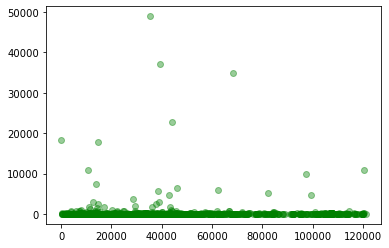

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(resta_sups_wrong.index, resta_sups_wrong.values, marker = 'o', color = "green", label='serie sin', alpha = 0.4)


In [39]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool

p = figure(plot_width=600, plot_height=400)
p.circle(x=resta_sups_wrong.index, y=resta_sups_wrong.values, size=8)

hover = HoverTool(tooltips=[("index", "$index"), ("(x,y)", "($x, $y)")])

p.add_tools(hover)
output_notebook()
show(p)

Loading BokehJS ...

In [40]:
# Para leer mejor los datos:
pd.options.display.max_colwidth = 1000

# [0,154,465,502, 608,371,837,897,890,1090,814]
watching = [0,154,465,502, 608,371]
print(data.loc[mask_size_surfaces].iloc[watching].description)

78                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   S/AVDA   COSTANERA ,  NUEVA  ZONA GASTRONOMICA  FRENTE AL BALNEARIO EL BRETE. IDEAL VIVIENDA  FLIAR. MAS EMPRENDIMIENTO  COMERCIAL  APTO RESTAURANTE Y PARRILLA. PLANTA ALTA 3 DORM (1 EN SUITE)  PATIO FRENTE Y FONDO, $  5. 500.000.- SE RECIBE  INMUEBLE A CUENTA. TERRENO 24.14 x 10.78. CUENTA CON BAÑO PARA DISCAPACITADO, Y HABILITACION PARA COMERCIO GASTR

In [41]:
# Vuelvoa configurar el valor default:
pd.options.display.max_colwidth = 40
data.loc[mask_size_surfaces].iloc[watching]

,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
78,house,Posadas,|Argentina|Misiones|Posadas|,Misiones,5500000.0,ARS,5442626.35,308460.22,261.0,18615.0,1181.839923,295.460650,5.0,"S/AVDA COSTANERA , NUEVA ZONA GA...",Oportunidad! Casa zona Bahía el Brete,308460.0,NaN,NaN
12559,house,Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|...,Bs.As. G.B.A. Zona Norte,620000.0,USD,10939590.00,620000.00,270.0,301.0,2296.296296,2059.800664,NaN,UBICACION:Excelente ubicaciÃ³n en zo...,"Casa 270m² con Teléfono en Madero, D...",620000.0,NaN,NaN
34455,apartment,Villa Gesell,|Argentina|Buenos Aires Costa Atlánt...,Buenos Aires Costa Atlántica,130000.0,USD,2293785.00,130000.00,55.0,66.0,2363.636364,1969.696970,2.0,Construido sobre la primer linea de ...,Venta Dpto Frente al mar en Comple...,130000.0,NaN,NaN
37354,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|...,Bs.As. G.B.A. Zona Norte,400000.0,USD,7057800.00,400000.00,226.0,230.0,1769.911504,1739.130435,NaN,Chalet en muy buen estado. P.B.: Hal...,"Casa 226m² con 3 Plantas en Edison, ...",400000.0,NaN,NaN
45505,house,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lo...,Bs.As. G.B.A. Zona Sur,170000.0,USD,2999565.00,170000.00,165.0,223.0,1030.303030,762.331839,NaN,CODIGO: 031 ubicado en: CAPDEVILLA 7...,CHALET EN DOS PLANTAS EN BANFIELD,170000.0,NaN,NaN
28456,apartment,Canning,|Argentina|Bs.As. G.B.A. Zona Sur|Es...,Bs.As. G.B.A. Zona Sur,117100.0,USD,2066170.95,117100.00,14.0,46.0,8364.285714,2545.652174,NaN,CODIGO: ubicado en: Espacio las Cav...,Departamento en venta en Espacio Las...,117100.0,NaN,NaN


Vemos que se podría sacar información de `description`, pero queda fuera del alacance de este trabajo.

## Análisis de "Precio por Superficie" en USD/m2

Vamos a ver qué relación hay entre las columas de precio, superficies y precios por superfice.

In [42]:
data.head(1)

,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,2 AMBIENTES TIPO CASA PLANTA BAJA PO...,2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,55.0,40.0


Pareciera que:
- "price_usd_per_m2" es "price" / "surface_total_in_m2"
- "price_per_m2" es "price" / "surface_covered_in_m2"

Vamos a verificarlo.

In [43]:
# precios del m2 estimados:
serie_price_usd_per_m2_estimada = (data["price"] / data["surface_total_in_m2"]).round(2)
serie_price_per_m2_estimada = (data["price"] / data["surface_covered_in_m2"]).round(2)

print('Datos: '+str(serie_price_usd_per_m2_estimada.notnull().sum()))
print('Datos: '+str(serie_price_per_m2_estimada.notnull().sum()))

Datos: 68866
Datos: 87660


In [44]:
mask_usd = data["currency"] == 'USD'

#Redefino mi serie en base a la moneda:
serie_price_usd_per_m2_estimada.loc[mask_usd] = (data.loc[mask_usd,"price"] / data.loc[mask_usd,"surface_total_in_m2"]).round(2)
serie_price_usd_per_m2_estimada.loc[np.logical_not(mask_usd)] = (data.loc[np.logical_not(mask_usd),"price"] / data.loc[np.logical_not(mask_usd),"surface_total_in_m2"]/17.8305).round(2)

In [45]:
# Calculo la relación para la serie:
dif_price_usd_per_m2_estimada = (serie_price_usd_per_m2_estimada / data["price_usd_per_m2"].round(2))
dif_price_usd_per_m2_estimada.max()

1.0000168248199743

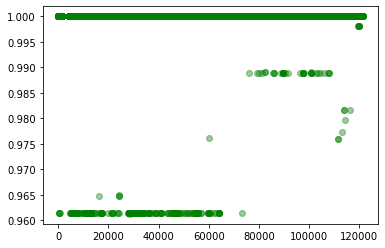

In [46]:
# Hago el gráfico de la primera serie:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(dif_price_usd_per_m2_estimada.index, dif_price_usd_per_m2_estimada.values, marker = 'o', color = "green", label='serie sin', alpha = 0.4)

In [47]:
# Calculo la relación para la otra serie:
dif_price_per_m2_estimada = serie_price_per_m2_estimada / data["price_per_m2"].round(2)
dif_price_per_m2_estimada.min()

1.0

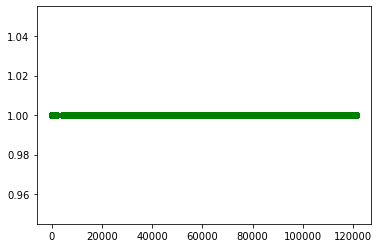

In [48]:
# Hago el gráfico de la segunda serie:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(dif_price_per_m2_estimada.index, dif_price_per_m2_estimada.values, marker = 'o', color = "green", label='serie sin', alpha = 0.4)

Entonces:
- Para el caso de "price_per_m2": se divide la columna ""price", sin importar las unidades, con la columna "surface_covered_in_m2".
- Para el caso de "price_usd_per_m2": se divide la columna ""price", corregido por currency, con la columna "surface_total_in_m2".

Vamos a generar una nueva columna con los precios en dolares dividido la superficie total y los precios en dolares dividido la superficie cubierta. A diferencia de las originales, estas sí serán representativas: todas en dolares y teniendo en cuenta el tipo de superficie correcto, usando las nuevas columnas de datos.

In [49]:
data['precio_por_superficie_TOTAL'] = data['price_USD']/data['superficie_TOTAL']
data['precio_por_superficie_CUBIERTA'] = data['price_USD']/data['superficie_CUBIERTA']

Vemos con cuantos nulls y tamaño quedó nuestro DF

In [50]:
print(data.isnull().sum()/data.shape[0])
print(data.shape[0])

property_type                     0.000000
place_name                        0.000190
place_with_parent_names           0.000000
state_name                        0.000000
price                             0.168377
currency                          0.168377
price_aprox_local_currency        0.168377
price_aprox_usd                   0.168377
surface_total_in_m2               0.324413
surface_covered_in_m2             0.164194
price_usd_per_m2                  0.433928
price_per_m2                      0.276845
rooms                             0.609053
description                       0.000016
title                             0.000000
price_USD                         0.168377
superficie_TOTAL                  0.333537
superficie_CUBIERTA               0.173319
precio_por_superficie_TOTAL       0.439934
precio_por_superficie_CUBIERTA    0.284888
dtype: float64
121216


Veamos si hay registros con superficies definidas pero no con datos de precios y viceversa.

In [51]:
mask_prices = data.price_USD.isnull()
mask_surface_total = data.superficie_TOTAL.isnull()
mask_surface_cubierta = data.superficie_CUBIERTA.isnull()

print("Datos con precios pero sin superficie total: " + str(np.logical_and(np.logical_not(mask_prices),mask_surface_total).sum()))
print("Datos con precios pero sin superficie cubierta: " + str(np.logical_and(np.logical_not(mask_prices),mask_surface_cubierta).sum()))
print("Datos sin precios pero con superficie total: " + str(np.logical_and(np.logical_not(mask_surface_total),mask_prices).sum()))
print("Datos sin precios pero con superficie cubierta: " + str(np.logical_and(np.logical_not(mask_surface_cubierta),mask_prices).sum()))
print("Datos SIN precios: " + str(mask_prices.sum()))

Datos con precios pero sin superficie total: 32917
Datos con precios pero sin superficie cubierta: 14123
Datos sin precios pero con superficie total: 12897
Datos sin precios pero con superficie cubierta: 13524
Datos SIN precios: 20410


Elimino registros que NO tienen precio.

In [52]:
# Busco los índices:
mask_NaN_prices = np.logical_and(np.logical_and(data.price.isnull(),data.currency.isnull()),np.logical_and(data.price_aprox_local_currency.isnull(),data.price_aprox_usd.isnull()))
print('Cantidad de elementos a eliminar:' + str(mask_NaN_prices.sum()))
inds_prices = data.loc[mask_NaN_prices].index
inds_prices

Cantidad de elementos a eliminar:20410


Int64Index([     5,     20,     41,     62,     67,     76,     83,     84,
                85,    100,
            ...
            121127, 121129, 121142, 121207, 121208, 121210, 121211, 121212,
            121213, 121214],
           dtype='int64', length=20410)

In [53]:
data_clean_prices = data.drop(index = inds_prices)
                           
print(data.shape[0])
print(data_clean_prices.shape[0])

121216
100806


Elimino registros que NO tienen NINGÚN dato de superficies: o son NaN o 0.0 o sus combinaciones, ambas al mismo tiempo.
Puedo tener dato definido en la total, o en la cubierta o en los dos.

In [54]:
mask_NaN_ceros_surfaces = np.logical_and(np.logical_or(data_clean_prices.superficie_TOTAL.isnull(), data_clean_prices.superficie_TOTAL == 0), np.logical_or(data_clean_prices.superficie_CUBIERTA.isnull(), data_clean_prices.superficie_CUBIERTA == 0))
                                
print('Cantidad de elementos a eliminar:' + str(mask_NaN_ceros_surfaces.sum()))
inds_surfaces = data_clean_prices.loc[mask_NaN_ceros_surfaces].index
inds_surfaces

Cantidad de elementos a eliminar:8858


Int64Index([     1,      3,      9,     11,     65,     70,     71,     72,
                78,     88,
            ...
            120979, 121055, 121062, 121069, 121070, 121079, 121101, 121133,
            121134, 121144],
           dtype='int64', length=8858)

In [55]:
print("Antes de la limpieza: " + str(data_clean_prices.shape[0]))

data_clean_prices_sups = data_clean_prices.drop(index = inds_surfaces)
                           
print("Después de la limpieza: " + str(data_clean_prices_sups.shape[0]))

Antes de la limpieza: 100806
Después de la limpieza: 91948


In [56]:
print(data_clean_prices_sups.isnull().sum()/data_clean_prices_sups.shape[0])
print(data_clean_prices_sups.shape[0])

property_type                     0.000000
place_name                        0.000250
place_with_parent_names           0.000000
state_name                        0.000000
price                             0.000000
currency                          0.000000
price_aprox_local_currency        0.000000
price_aprox_usd                   0.000000
surface_total_in_m2               0.264367
surface_covered_in_m2             0.057261
price_usd_per_m2                  0.264367
price_per_m2                      0.057282
rooms                             0.594303
description                       0.000011
title                             0.000000
price_USD                         0.000000
superficie_TOTAL                  0.264367
superficie_CUBIERTA               0.057261
precio_por_superficie_TOTAL       0.264367
precio_por_superficie_CUBIERTA    0.057261
dtype: float64
91948


In [57]:
mask = data_clean_prices_sups.precio_por_superficie_TOTAL == 0
mask.sum()
data_clean_prices_sups.loc[mask]

,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA


## Imputación de superficies faltantes

Luego de la eliminar los registros que no cuentan con ningún dato de precios ni de superficies entre sus columnas principales -recordemos que NO se relevan dichos datos de las columnas `description` ni de `title`-, nos quedamos con algunos registros que tienen definido el precio y alguna de las dos superficies.

Del análisis vemos que tenemos muchos más datos faltantes en la columna `superficie_TOTAL` que en la `superficie_CUBIERTA`.

Vamos a utilizar el dato de una de las columnas para rellenar el dato de superficie faltante.
Esta decisión conlleva a una distorón de datos que veremos a continuación.

In [58]:
# configuro para poder copiar sin warnings
pd.set_option('mode.chained_assignment', None)

In [59]:
data_clean = data_clean_prices_sups.copy()

In [60]:
# si es null o cero lo imputo con el valor de la superficie CUBIERTA
mask_sup_total_nulls = np.logical_or(data_clean_prices_sups.superficie_TOTAL.isnull(), data_clean_prices_sups.superficie_TOTAL == 0)

# Imputo el dato:
data_clean.superficie_TOTAL.loc[mask_sup_total_nulls] = data_clean_prices_sups.superficie_CUBIERTA.loc[mask_sup_total_nulls]

In [61]:
# si es null o cero lo imputo con el valor de la superficie TOTAL
mask_sup_cubierta_nulls = np.logical_or(data_clean_prices_sups.superficie_CUBIERTA.isnull(), data_clean_prices_sups.superficie_CUBIERTA == 0)

# Imputo el dato:
data_clean.superficie_CUBIERTA.loc[mask_sup_cubierta_nulls] = data_clean_prices_sups.superficie_TOTAL.loc[mask_sup_cubierta_nulls]

In [62]:
# reseteo configuración para poder copiar sin warnings
pd.reset_option('mode.chained_assignment')

In [63]:
print("Superfie TOTAL antes vs después de la imputación:")
print(str(data_clean_prices_sups.superficie_TOTAL.describe().round(2)) + '\n\n\n' + str(data_clean.superficie_TOTAL.describe().round(2)))

Superfie TOTAL antes vs después de la imputación:
count     67640.00
mean        224.10
std        1771.81
min          10.00
25%          50.00
50%          82.00
75%         200.00
max      200000.00
Name: superficie_TOTAL, dtype: float64


count     91948.00
mean        201.77
std        1650.18
min           1.00
25%          49.00
50%          80.00
75%         185.00
max      200000.00
Name: superficie_TOTAL, dtype: float64


In [64]:
print("Superfie CUBIERTA antes vs después de la imputación:")
print(str(data_clean_prices_sups.superficie_CUBIERTA.describe().round(2)) + '\n\n\n' + str(data_clean.superficie_CUBIERTA.describe().round(2)))

Superfie CUBIERTA antes vs después de la imputación:
count     86683.00
mean        125.82
std         705.43
min           0.00
25%          45.00
50%          73.00
75%         150.00
max      187000.00
Name: superficie_CUBIERTA, dtype: float64


count     91948.00
mean        131.96
std         971.82
min           1.00
25%          45.00
50%          72.00
75%         150.00
max      200000.00
Name: superficie_CUBIERTA, dtype: float64


In [150]:
print(data_clean.isnull().sum()/data_clean.shape[0])
print(data_clean.shape[0])

property_type                     0.000000
place_name                        0.000131
place_with_parent_names           0.000000
state_name                        0.000000
price                             0.000000
currency                          0.000000
price_aprox_local_currency        0.000000
price_aprox_usd                   0.000000
surface_total_in_m2               0.266909
surface_covered_in_m2             0.057840
price_usd_per_m2                  0.266909
price_per_m2                      0.057853
rooms                             0.586669
description                       0.000013
title                             0.000000
price_USD                         0.000000
superficie_TOTAL                  0.000000
superficie_CUBIERTA               0.000000
precio_por_superficie_TOTAL       0.266909
precio_por_superficie_CUBIERTA    0.057840
Cochera                           0.000000
Dism_Valor                        0.000000
A_reciclar                        0.000000
A_estrenar 

Naturalmente, con esta imputación, la media de la `superficie_TOTAL` sube y para la `superficie_CUBIERTA` baja.

Lo mismo sucede con los desvíos.

En el caso de `superficie_CUBIERTA` se modifica el **max** valor pero luego se tomará alguna decisión analizando los outliers.

**Termino de completar los datos de precio por superfice.**

In [151]:
data_clean.isnull().sum()/data_clean.shape[0]

property_type                     0.000000
place_name                        0.000131
place_with_parent_names           0.000000
state_name                        0.000000
price                             0.000000
currency                          0.000000
price_aprox_local_currency        0.000000
price_aprox_usd                   0.000000
surface_total_in_m2               0.266909
surface_covered_in_m2             0.057840
price_usd_per_m2                  0.266909
price_per_m2                      0.057853
rooms                             0.586669
description                       0.000013
title                             0.000000
price_USD                         0.000000
superficie_TOTAL                  0.000000
superficie_CUBIERTA               0.000000
precio_por_superficie_TOTAL       0.266909
precio_por_superficie_CUBIERTA    0.057840
Cochera                           0.000000
Dism_Valor                        0.000000
A_reciclar                        0.000000
A_estrenar 

In [152]:
# configuro para poder copiar sin warnings
pd.set_option('mode.chained_assignment', None)

In [153]:
data_clean.precio_por_superficie_TOTAL = data_clean.price_USD/data_clean.superficie_TOTAL
data_clean.precio_por_superficie_CUBIERTA = data_clean.price_USD/data_clean.superficie_CUBIERTA

In [154]:
# configuro para poder copiar sin warnings
pd.reset_option('mode.chained_assignment')

In [155]:
data_caba.isnull().sum()/data_caba.shape[0]

property_type                     0.0
place_name                        0.0
state_name                        0.0
description                       0.0
title                             0.0
price_USD                         0.0
superficie_TOTAL                  0.0
superficie_CUBIERTA               0.0
precio_por_superficie_TOTAL       0.0
precio_por_superficie_CUBIERTA    0.0
Cochera                           0.0
Dism_Valor                        0.0
A_reciclar                        0.0
A_estrenar                        0.0
Agr_Valor                         0.0
dtype: float64

## Análisis de outliers

Vemoas ver la distribución de Precios en dólares. Cada 1 en X son 10Millones de dólares


In [156]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

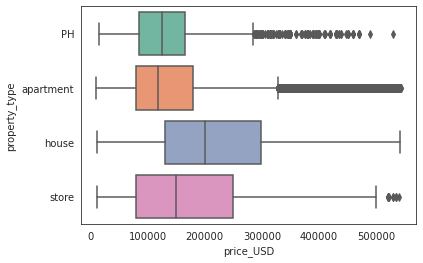

In [157]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="price_USD", y="property_type", data=data_clean)

Sacándole el valos de 46M se lee mejor el gráfico

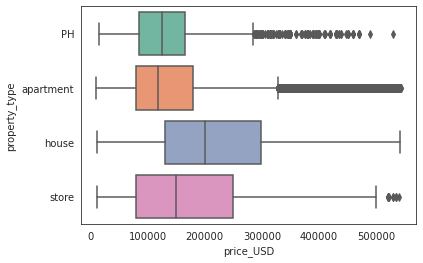

In [158]:
menos20Millones_mask=data_clean['price_USD']<20000000
menos20Millones=data_clean.loc[menos20Millones_mask,:]
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="price_USD", y="property_type", data=menos20Millones)

In [159]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return (lower_bound,upper_bound)

**Analicemos los Outliers del precio**

In [160]:
lower_bound,upper_bound=detect_outlier(data_clean['price_USD'])
lower_bound, upper_bound

(-112000.0, 416000.0)

Veamos cuántos datos quedan por encima del límite: 

In [161]:
upper_bound_mask = data_clean['price_USD']>=upper_bound
mayor_upper_bound = data_clean.loc[upper_bound_mask,:].shape

In [162]:
mayor_upper_bound

(2949, 25)

El límite inferior no tiene sentido ya que no hay valores negativos. Por lo tanto, definimos un valor de USD10.000 ya que no nos van a interesar las propiedades por valores menores a esta línea de corte.

In [163]:
menor10k_mask=data_clean['price_USD']<10000
menor_menor10k=data_clean.loc[menor10k_mask,:].shape

In [164]:
menor_menor10k

(0, 25)

**Analiamos ahora la superficie TOTAL**


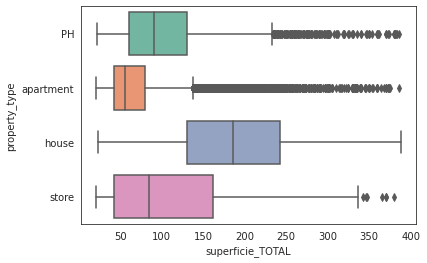

In [165]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="superficie_TOTAL", y="property_type", data=data_clean)

In [166]:
#me fijo los Outliers de la superficie
detect_outlier(data_clean['superficie_TOTAL'])

(-77.5, 254.5)

In [167]:
lower_bound_sup,upper_bound_sup=detect_outlier(data_clean['superficie_TOTAL'])

In [168]:
#Analizo límite superior, tiene sentido son pocos registros
upper_bound_sup_mask=data_clean['superficie_TOTAL']>=upper_bound_sup
mayor_upper_bound_sup=data_clean.loc[upper_bound_sup_mask,:].shape

In [169]:
mayor_upper_bound_sup

(4324, 25)

In [170]:
data_clean.superficie_TOTAL.sort_values()

88803      21.0
83534      21.0
92459      21.0
116040     21.0
11214      21.0
          ...  
26157     388.0
34285     388.0
23843     388.0
12751     388.0
47835     388.0
Name: superficie_TOTAL, Length: 76573, dtype: float64

N exiten superficies negativas, pero tenemos superficies de 1 m2. Veamos cuántos registros hay con superficies menores a 20 m2.

In [171]:
lower_bound_sup_mask=data_clean['superficie_TOTAL']<20
menor_lower_bound_sup=data_clean.loc[lower_bound_sup_mask,:].shape

In [172]:
menor_lower_bound_sup

(0, 25)

Vamos a desestimar los resgistros con superficie total menor a 20 m2.

**Analiamos ahora la superficie CUBIERTA**


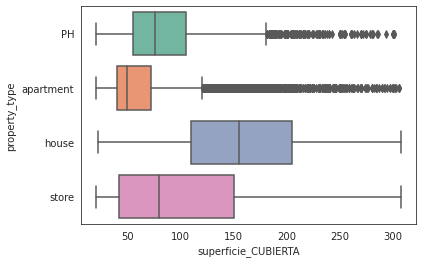

In [173]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="superficie_CUBIERTA", y="property_type", data=data_clean)

In [174]:
#me fijo los Outliers de la superficie
detect_outlier(data_clean['superficie_CUBIERTA'])

(-55.0, 209.0)

In [175]:
lower_bound_sup_cubierta,upper_bound_sup_cubierta = detect_outlier(data_clean['superficie_CUBIERTA'])

In [176]:
#Analizo límite superior, tiene sentido son pocos registros
upper_bound_sup_cubierta_mask = data_clean['superficie_CUBIERTA'] >= upper_bound_sup_cubierta
mayor_upper_bound_sup_cubierta = data_clean.loc[upper_bound_sup_mask,:].shape

In [177]:
mayor_upper_bound_sup

(4324, 25)

In [178]:
data_clean.superficie_CUBIERTA.sort_values()

34856      21.0
41318      21.0
51085      21.0
95967      21.0
27543      21.0
          ...  
115547    307.0
117834    307.0
22483     307.0
13262     307.0
64808     307.0
Name: superficie_CUBIERTA, Length: 76573, dtype: float64

No exiten superficies negativas, pero tenemos superficies de 1 m2. Veamos cuántos registros hay con superficies menores a 20 m2.

In [179]:
lower_bound_sup_cubierta_mask = data_clean['superficie_CUBIERTA']<20
menor_lower_bound_sup = data_clean.loc[lower_bound_sup_cubierta_mask,:].shape

In [180]:
menor_lower_bound_sup

(0, 25)

Vamos a desestimar los resgistros con superficie cubierta menor a 20 m2.

In [181]:
#Podemos seguir limpiando la data
mask1=data_clean['price_USD'] > 10000
mask2=data_clean['price_USD'] < upper_bound
mask3=data_clean['superficie_TOTAL'] < upper_bound_sup
mask4=data_clean['superficie_TOTAL'] > 20
mask5=data_clean['superficie_CUBIERTA'] < upper_bound_sup_cubierta
mask6=data_clean['superficie_CUBIERTA'] > 20
mask_outliers = mask1&mask2&mask3&mask4&mask5&mask6
data_clean.shape

(76573, 25)

In [182]:
data_clean=data_clean.loc[mask_outliers,:]

In [183]:
data_clean.shape

(68090, 25)

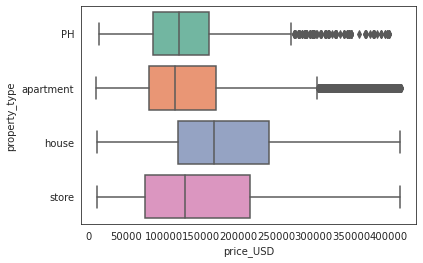

In [184]:
#Graficamos de nuevo
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="price_USD", y="property_type", data=data_clean)

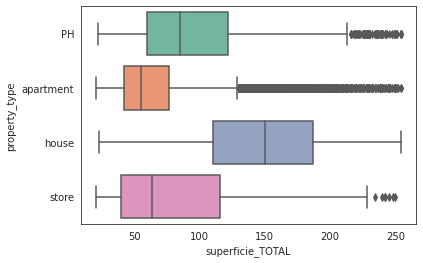

In [185]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="superficie_TOTAL", y="property_type", data=data_clean)

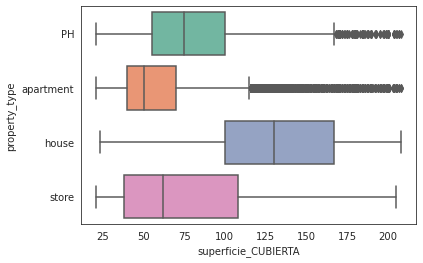

In [186]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="superficie_CUBIERTA", y="property_type", data=data_clean)

### Acá arranca el análisis con **REGEX** para determinar información de `description`

Donde se trata de obtener info con los regex.

In [187]:
#data_clean

In [188]:
#paso la columna a mayúscula para no tener tantos patrones
uppercase_description= data_clean['description'].apply(lambda x:x if x is np.NaN else x.upper())

In [189]:
#Creo un patrón para cochera
patron_cochera="((COCHERA)S?|(GARAGE)S?|(GGE)|(ESTACIONAMIENTO)|(ENTRADA DE COCHE))"
regex_cochera=re.compile(patron_cochera)
resultado_cochera = uppercase_description.apply(lambda x:x if x is np.NaN else regex_cochera.search(x))
print(resultado_cochera)

0                                            None
2                                            None
4                                            None
6                                            None
7                                            None
                           ...                   
121206                                       None
121209                                       None
121217    <re.Match object; span=(555, 563), m...
121218                                       None
121219                                       None
Name: description, Length: 68090, dtype: object


In [275]:
#Creo una nueva columna llamada Cochera con los números encontrados (1 informa/0 no)
mask_resultado_cochera_notnull=resultado_cochera.notnull()
data_clean.loc[mask_resultado_cochera_notnull,"Cochera"]=resultado_cochera[mask_resultado_cochera_notnull].apply(lambda x: 1)
data_clean['Cochera'].notnull().sum()

68090

In [274]:
#completo los valores nulos para que queden en 0
data_clean['Cochera']=data_clean['Cochera'].fillna(0)

In [192]:
#Creo un patrón para escalera o otras cosas que disminuyen valor
patron_escalera="(POR ESCALERA)|(AL FONDO)|(CONTRAFRENTE)|(LATERAL)"
regex_escalera=re.compile(patron_escalera)
resultado_escalera = uppercase_description.apply(lambda x:x if x is np.NaN else regex_escalera.search(x))
print(resultado_escalera)

0                                            None
2         <re.Match object; span=(21, 28), mat...
4         <re.Match object; span=(53, 65), mat...
6                                            None
7                                            None
                           ...                   
121206                                       None
121209                                       None
121217                                       None
121218    <re.Match object; span=(9, 21), matc...
121219                                       None
Name: description, Length: 68090, dtype: object


In [193]:
#Creo una nueva columna llamada Dism_Valor con los registros encontrados (1 informa/0 no)
mask_resultado_escalera_notnull=resultado_escalera.notnull()
data_clean.loc[mask_resultado_escalera_notnull,"Dism_Valor"]=resultado_escalera[mask_resultado_escalera_notnull].apply(lambda x: 1)
data_clean['Dism_Valor']=data_clean['Dism_Valor'].fillna(0)
data_clean['Dism_Valor']

C:\Users\Ariel\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0         0.0
2         1.0
4         1.0
6         0.0
7         0.0
         ... 
121206    0.0
121209    0.0
121217    0.0
121218    1.0
121219    0.0
Name: Dism_Valor, Length: 68090, dtype: float64

In [194]:
#Creo un patrón para reciclar
patron_reciclar="(A RECICLAR)|(RENOVAR)|(REFACCIONAR)"
regex_reciclar=re.compile(patron_reciclar)
resultado_reciclar = uppercase_description.apply(lambda x:x if x is np.NaN else regex_reciclar.search(x))
print(resultado_reciclar)

0                                            None
2                                            None
4                                            None
6                                            None
7                                            None
                           ...                   
121206                                       None
121209                                       None
121217                                       None
121218                                       None
121219    <re.Match object; span=(216, 226), m...
Name: description, Length: 68090, dtype: object


In [195]:
#Creo una nueva columna llamada Reciclar con los registros encontrados (1 informa/0 no)
mask_resultado_reciclar_notnull=resultado_reciclar.notnull()
data_clean.loc[mask_resultado_reciclar_notnull,"A_reciclar"]=resultado_reciclar[mask_resultado_reciclar_notnull].apply(lambda x: 1)
data_clean['A_reciclar']=data_clean['A_reciclar'].fillna(0)
data_clean['A_reciclar']

C:\Users\Ariel\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0         0.0
2         0.0
4         0.0
6         0.0
7         0.0
         ... 
121206    0.0
121209    0.0
121217    0.0
121218    0.0
121219    1.0
Name: A_reciclar, Length: 68090, dtype: float64

In [196]:
#Creo un patrón para saber si es a estrenar
patron_estrenar="A?\s?(ESTRENAR)"
regex_estrenar=re.compile(patron_estrenar)
resultado_estrenar = uppercase_description.apply(lambda x:x if x is np.NaN else regex_estrenar.search(x))
print(resultado_estrenar)

0                                            None
2                                            None
4                                            None
6                                            None
7         <re.Match object; span=(23, 33), mat...
                           ...                   
121206                                       None
121209                                       None
121217    <re.Match object; span=(38, 48), mat...
121218                                       None
121219                                       None
Name: description, Length: 68090, dtype: object


In [197]:
#Creo una nueva columna llamada A_estrenar con los registros encontrados(1 informa/0 no)
mask_resultado_estrenar_notnull=resultado_estrenar.notnull()
data_clean.loc[mask_resultado_estrenar_notnull,"A_estrenar"]=resultado_estrenar[mask_resultado_estrenar_notnull].apply(lambda x: 1)
data_clean['A_estrenar']=data_clean['A_estrenar'].fillna(0)
data_clean['A_estrenar']

C:\Users\Ariel\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0         0.0
2         0.0
4         0.0
6         0.0
7         1.0
         ... 
121206    0.0
121209    0.0
121217    1.0
121218    0.0
121219    0.0
Name: A_estrenar, Length: 68090, dtype: float64

In [198]:
#Creo un patrón para cosas que le agreguen valor
patron_valor="(AMENITIES)|(PILETA)|(PISCINA)|(SUM)|(GIMNASIO)|(SEGURIDAD)|(SAUNA)|(PLAZA)|(BAÑOS)|(APTO PROFESIONAL)|(TERRAZA)|(PATIO)|(PTIO)"
regex_valor=re.compile(patron_valor)
resultado_valor = uppercase_description.apply(lambda x:x if x is np.NaN else regex_valor.search(x))
print(resultado_valor)

0         <re.Match object; span=(69, 74), mat...
2                                            None
4                                            None
6         <re.Match object; span=(155, 160), m...
7         <re.Match object; span=(101, 107), m...
                           ...                   
121206    <re.Match object; span=(173, 178), m...
121209                                       None
121217    <re.Match object; span=(56, 65), mat...
121218    <re.Match object; span=(309, 314), m...
121219    <re.Match object; span=(22, 38), mat...
Name: description, Length: 68090, dtype: object


In [199]:
#Creo una nueva columna llamada Agr_Valor con los registros encontrados(1 informa/0 no)
mask_resultado_valor_notnull=resultado_valor.notnull()
data_clean.loc[mask_resultado_valor_notnull,"Agr_Valor"]=resultado_valor[mask_resultado_valor_notnull].apply(lambda x: 1)
data_clean['Agr_Valor']=data_clean['Agr_Valor'].fillna(0)
data_clean['Agr_Valor']

C:\Users\Ariel\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0         1.0
2         0.0
4         0.0
6         1.0
7         1.0
         ... 
121206    1.0
121209    0.0
121217    1.0
121218    1.0
121219    1.0
Name: Agr_Valor, Length: 68090, dtype: float64

In [200]:
data_clean.head(5)

,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,...,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,Cochera,Dism_Valor,A_reciclar,A_estrenar,Agr_Valor
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,...,62000.0,55.0,40.0,1127.272727,1550.000000,0.0,0.0,0.0,0.0,1.0
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,55.0,...,72000.0,55.0,55.0,1309.090909,1309.090909,0.0,1.0,0.0,0.0,0.0
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlánt...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.0,64000.0,35.0,35.0,...,64000.0,35.0,35.0,1828.571429,1828.571429,0.0,1.0,0.0,0.0,0.0
6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|...,Bs.As. G.B.A. Zona Norte,130000.0,USD,2293785.0,130000.0,106.0,78.0,...,130000.0,106.0,78.0,1226.415094,1666.666667,0.0,0.0,0.0,0.0,1.0
7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,138000.0,USD,2434941.0,138000.0,45.0,40.0,...,138000.0,45.0,40.0,3066.666667,3450.000000,0.0,0.0,0.0,1.0,1.0


In [201]:
#Puedo describir en general las métricas
medidas= data_clean[["price_USD", "superficie_TOTAL", "superficie_CUBIERTA", "precio_por_superficie_TOTAL", "precio_por_superficie_CUBIERTA"]].describe().round(2)

In [202]:
medidas

,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA
count,68090.00,68090.00,68090.00,68090.00,68090.00
mean,145293.88,81.72,73.28,1980.68,2176.62
std,81917.33,49.34,42.54,893.14,984.17
min,10039.00,21.00,21.00,59.74,60.49
25%,84000.00,45.00,42.00,1402.10,1527.78
50%,123800.00,65.00,60.00,1882.35,2027.78
75%,185000.00,103.00,91.00,2437.50,2673.08
max,415962.00,254.00,208.00,16628.00,16628.00


In [203]:
#Aplico Group by para ver info resumida
data_grouped = data_clean.groupby('state_name')

In [204]:
Analisis=data_grouped['price_USD'].describe()
Analisis

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
Bs.As. G.B.A. Zona Norte,14016.0,184115.927155,86971.272685,10375.0,119000.00,165000.0,245000.00,415962.0
Bs.As. G.B.A. Zona Oeste,4750.0,113752.956211,63450.145179,14021.0,70026.25,90000.0,140000.00,410000.0
Bs.As. G.B.A. Zona Sur,7636.0,138795.937795,75153.660024,10656.0,83000.00,120000.0,170000.00,410300.0
Buenos Aires Costa Atlántica,6421.0,118350.577169,68701.753239,10375.0,69000.00,95900.0,149000.00,410000.0
Buenos Aires Interior,963.0,132681.188993,73259.501382,11111.0,78517.00,119998.0,170000.00,415000.0
Capital Federal,22902.0,159362.340582,82401.123468,10039.0,97000.00,135000.0,200000.00,415808.0
Catamarca,6.0,208191.000000,126073.536026,98146.0,114000.00,155500.0,301250.00,390000.0
Chaco,14.0,118138.714286,83110.897489,28042.0,56084.00,87911.5,166680.25,315000.0
Chubut,98.0,178691.408163,83118.914939,25798.0,120000.00,170000.0,230000.00,400000.0


In [205]:
data_grouped['superficie_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
Bs.As. G.B.A. Zona Norte,14016.0,100.763342,54.050173,21.0,58.00,82.0,137.00,254.0
Bs.As. G.B.A. Zona Oeste,4750.0,86.716842,57.178052,22.0,43.00,64.0,118.00,252.0
Bs.As. G.B.A. Zona Sur,7636.0,94.556050,52.372465,21.0,50.00,79.0,130.00,254.0
Buenos Aires Costa Atlántica,6421.0,73.217256,46.828400,21.0,40.00,60.0,87.00,251.0
Buenos Aires Interior,963.0,96.524403,55.683563,22.0,50.00,80.0,130.00,250.0
Capital Federal,22902.0,68.161864,38.976470,21.0,40.00,55.0,83.00,254.0
Catamarca,6.0,167.333333,70.910272,76.0,108.50,204.0,208.00,234.0
Chaco,14.0,116.500000,55.758752,41.0,64.75,125.5,157.75,200.0
Chubut,98.0,115.040816,48.874744,28.0,79.25,107.5,150.00,205.0


In [206]:
data_grouped['superficie_CUBIERTA'].describe()

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
Bs.As. G.B.A. Zona Norte,14016.0,88.987657,47.507104,21.0,52.00,73.0,119.0,208.0
Bs.As. G.B.A. Zona Oeste,4750.0,73.831789,43.279604,21.0,40.00,59.0,98.0,207.0
Bs.As. G.B.A. Zona Sur,7636.0,87.736904,47.107160,21.0,49.00,74.0,120.0,208.0
Buenos Aires Costa Atlántica,6421.0,66.632767,37.921024,21.0,40.00,55.0,80.0,208.0
Buenos Aires Interior,963.0,87.093458,45.381607,22.0,50.00,75.0,114.5,206.0
Capital Federal,22902.0,60.674570,32.881804,21.0,37.00,50.0,74.0,208.0
Catamarca,6.0,158.500000,63.899139,76.0,103.75,190.5,206.0,208.0
Chaco,14.0,109.857143,53.544887,38.0,61.75,108.5,154.0,200.0
Chubut,98.0,113.306122,48.494958,28.0,79.25,100.0,150.0,200.0


In [207]:
#El precio por m2 aumenta si tiene o no cochera?
data_grouped=data_clean.groupby(["property_type","Cochera"])
m2=data_grouped['precio_por_superficie_TOTAL'].mean()
m2

property_type  Cochera
PH             0.0        1502.969886
               1.0        1515.946792
apartment      0.0        2098.601592
               1.0        2308.222378
house          0.0        1301.207687
               1.0        1274.452470
store          0.0        2172.604329
               1.0        2106.042260
Name: precio_por_superficie_TOTAL, dtype: float64

In [216]:
#El precio por m2 aumenta si tiene o no cochera?
data_grouped=data_clean.groupby(["state_name","Cochera"])
m2=data_grouped['precio_por_superficie_TOTAL'].mean()
m2

state_name                    Cochera
Bs.As. G.B.A. Zona Norte      0.0        1841.770848
                              1.0        2185.600991
Bs.As. G.B.A. Zona Oeste      0.0        1503.458517
                              1.0        1578.506230
Bs.As. G.B.A. Zona Sur        0.0        1554.477317
                              1.0        1671.608973
Buenos Aires Costa Atlántica  0.0        1688.115301
                              1.0        1919.622532
Buenos Aires Interior         0.0        1624.673509
                              1.0        1546.757373
Capital Federal               0.0        2409.724749
                              1.0        2674.300777
Catamarca                     0.0        1690.474612
Chaco                         0.0         753.718333
                              1.0        1876.471027
Chubut                        0.0        1644.657498
                              1.0        2072.719635
Corrientes                    0.0        1483.395088
        

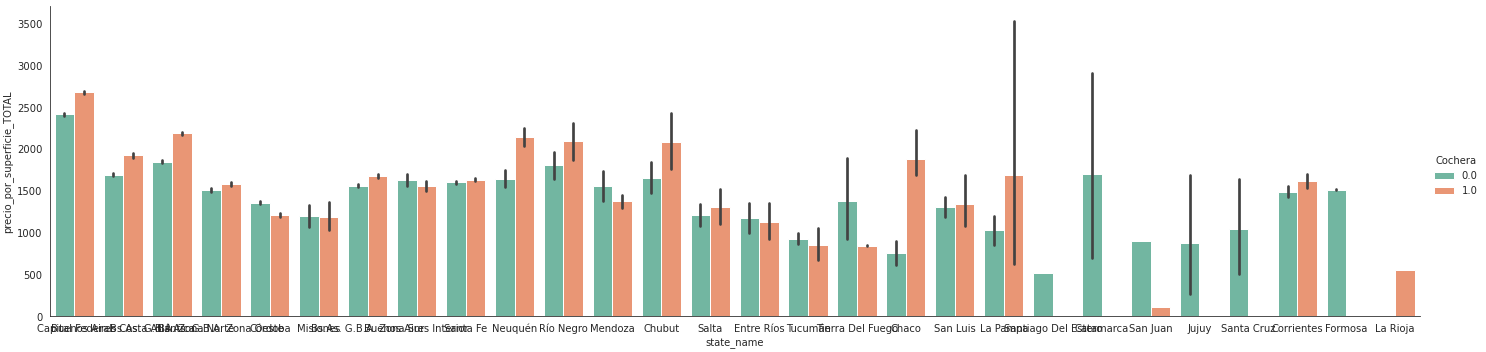

In [217]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="state_name",y='precio_por_superficie_TOTAL', data=data_clean, aspect=4.0, kind='bar',
                    hue='Cochera')
       
        g.set_ylabels('precio_por_superficie_TOTAL')

In [218]:
#El precio por m2 aumenta si es a estrenar?
data_grouped=data_clean.groupby(["state_name","A_estrenar"])
estreno=data_grouped['precio_por_superficie_TOTAL'].mean()
estreno

state_name                    A_estrenar
Bs.As. G.B.A. Zona Norte      0.0           2008.089785
                              1.0           2204.173912
Bs.As. G.B.A. Zona Oeste      0.0           1497.331170
                              1.0           1811.261542
Bs.As. G.B.A. Zona Sur        0.0           1591.013170
                              1.0           1811.259162
Buenos Aires Costa Atlántica  0.0           1733.933746
                              1.0           2097.439048
Buenos Aires Interior         0.0           1576.370773
                              1.0           1716.054672
Capital Federal               0.0           2480.127812
                              1.0           2652.522062
Catamarca                     0.0           1690.474612
Chaco                         0.0           1074.504817
Chubut                        0.0           1684.134576
                              1.0           1852.120543
Corrientes                    0.0           1527.643810
       

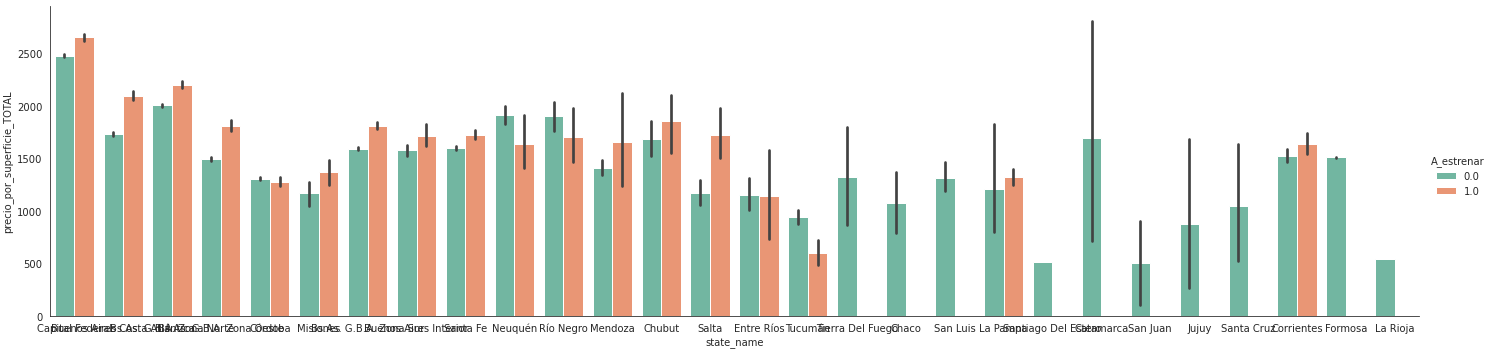

In [219]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="state_name",y='precio_por_superficie_TOTAL', data=data_clean, aspect=4.0, kind='bar',
                    hue='A_estrenar')
       
        g.set_ylabels('precio_por_superficie_TOTAL')

In [220]:
#El precio por m2 aumenta si es a reciclar?
data_grouped=data_clean.groupby(["state_name","A_reciclar"])
reciclar=data_grouped['precio_por_superficie_TOTAL'].mean()
reciclar

state_name                    A_reciclar
Bs.As. G.B.A. Zona Norte      0.0           2039.218016
                              1.0           1591.712657
Bs.As. G.B.A. Zona Oeste      0.0           1548.870744
                              1.0            933.713247
Bs.As. G.B.A. Zona Sur        0.0           1620.907337
                              1.0           1120.045417
Buenos Aires Costa Atlántica  0.0           1785.718667
                              1.0           1022.661045
Buenos Aires Interior         0.0           1607.766876
                              1.0            789.459397
Capital Federal               0.0           2511.132536
                              1.0           1780.782493
Catamarca                     0.0           1690.474612
Chaco                         0.0           1074.504817
Chubut                        0.0           1693.286131
                              1.0           1636.363636
Corrientes                    0.0           1553.831845
       

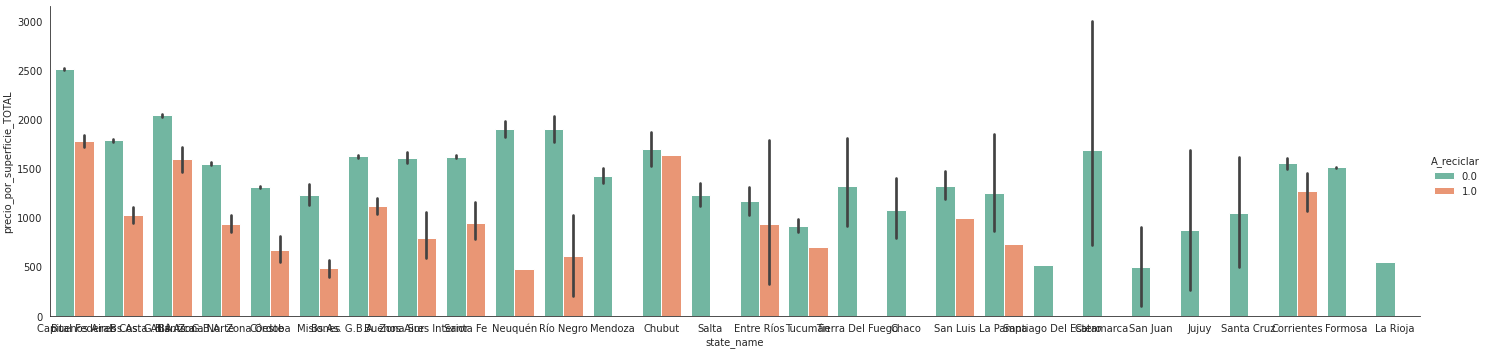

In [221]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="state_name",y='precio_por_superficie_TOTAL', data=data_clean, aspect=4.0, kind='bar',
                    hue='A_reciclar')
       
        g.set_ylabels('precio_por_superficie_TOTAL')

In [222]:
##El precio por m2 aumenta si tiene amenities, pileta, seguridad, etc?
data_grouped=data_clean.groupby(["property_type","Agr_Valor"])
agrvalor=data_grouped['precio_por_superficie_TOTAL'].mean()
agrvalor

property_type  Agr_Valor
PH             0.0          1511.748454
               1.0          1504.655796
apartment      0.0          2038.857595
               1.0          2280.994037
house          0.0          1289.226632
               1.0          1287.894755
store          0.0          2255.294955
               1.0          2006.759074
Name: precio_por_superficie_TOTAL, dtype: float64

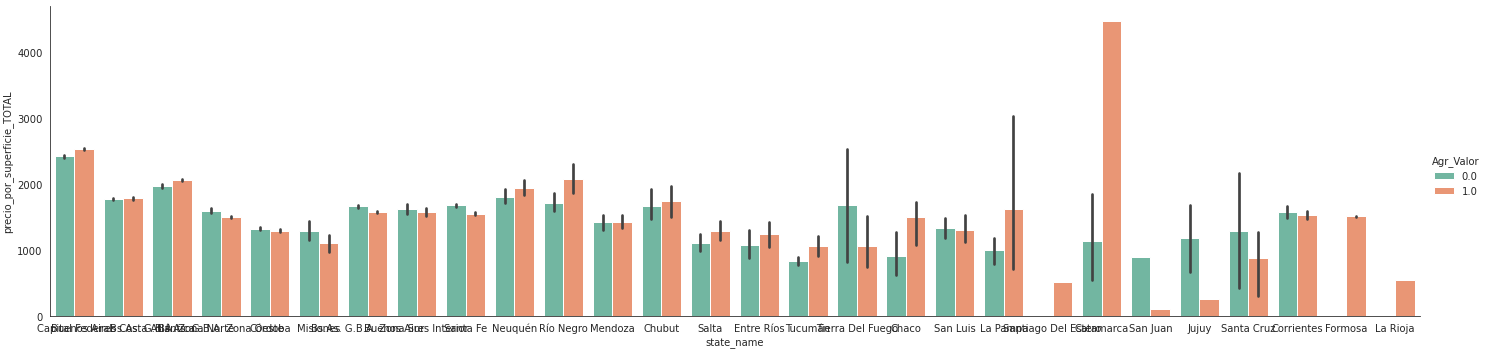

In [223]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="state_name",y='precio_por_superficie_TOTAL', data=data_clean, aspect=4.0, kind='bar',
                    hue='Agr_Valor')
       
        g.set_ylabels('precio_por_superficie_TOTAL')

In [224]:
#El precio por m2 disminuye si es al contrafrente, por escalera, etc?
data_grouped=data_clean.groupby(["property_type","Dism_Valor"])
dsmvalor=data_grouped['precio_por_superficie_TOTAL'].mean()
dsmvalor

property_type  Dism_Valor
PH             0.0           1496.529573
               1.0           1535.235534
apartment      0.0           2208.825391
               1.0           2092.350082
house          0.0           1284.210503
               1.0           1324.864355
store          0.0           2158.365746
               1.0           2301.927316
Name: precio_por_superficie_TOTAL, dtype: float64

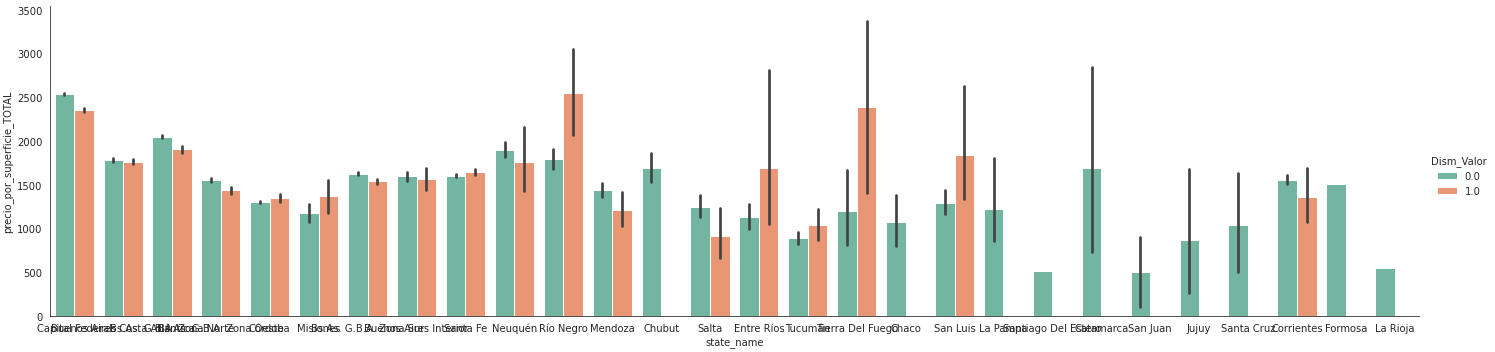

In [225]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="state_name",y='precio_por_superficie_TOTAL', data=data_clean, aspect=4.0, kind='bar',
                    hue='Dism_Valor')
       
        g.set_ylabels('precio_por_superficie_TOTAL')

### Acá arranca el análisis de Ariel con pivot tables y gráficos.


In [226]:
# Limpio algunas columnas que no me interesan:
subset = ['place_with_parent_names','price','currency','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','rooms']

df = data_clean.drop(subset, axis = 1)
print(df.shape)
df.sample(3)

(68090, 15)


,property_type,place_name,state_name,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,Cochera,Dism_Valor,A_reciclar,A_estrenar,Agr_Valor
27677,apartment,Ezeiza,Bs.As. G.B.A. Zona Sur,CODIGO: B ubicado en: San Juan 500 -...,Departamento en Venta,160000.0,130.0,110.0,1230.769231,1454.545455,0.0,0.0,0.0,0.0,0.0
89758,apartment,San Telmo,Capital Federal,Bernardo de Irigoyen 1418: Ubicada e...,Departamento - San Telmo,60800.0,38.0,32.0,1600.000000,1900.000000,1.0,1.0,0.0,0.0,1.0
74619,apartment,Lanús,Bs.As. G.B.A. Zona Sur,TIENE CONTRATO DE ALQ..........abril...,DEPARTAMENTO TRES AMBIENTES,135000.0,70.0,70.0,1928.571429,1928.571429,1.0,0.0,0.0,0.0,0.0


In [227]:
print("Tamaño del registro: "+str(df.shape[0]))
print("Cochera: "+str((df.Cochera==1).sum()))
print("Dism_Valor: "+str((df.Dism_Valor==1).sum()))
print("A_reciclar: "+str((df.A_reciclar==1).sum()))
print("Agr_Valor: "+str((df.Agr_Valor==1).sum()))


Tamaño del registro: 68090
Cochera: 28777
Dism_Valor: 10927
A_reciclar: 993
Agr_Valor: 43492


**Vamos a quedarnos con los datos de Capital Federal (CABA)**

In [228]:
mask_caba = df.state_name == "Capital Federal"
mask_caba.notnull().sum()

data_caba = df.loc[mask_caba]
data_caba.shape[0]

22902

In [229]:
DF = data_caba
print("Vemos registros de Capital Federal (CABA):")
print("Tamaño del registro: "+str(DF.shape[0]))
print("Cochera: "+str((DF.Cochera==1).sum()))
print("Dism_Valor: "+str((DF.Dism_Valor==1).sum()))
print("A_reciclar: "+str((DF.A_reciclar==1).sum()))
print("Agr_Valor: "+str((DF.Agr_Valor==1).sum()))

Vemos registros de Capital Federal (CABA):
Tamaño del registro: 22902
Cochera: 7729
Dism_Valor: 4481
A_reciclar: 380
Agr_Valor: 15695


In [230]:
data_place_name = data_caba.groupby('place_name')
type(data_place_name)

pandas.core.groupby.generic.DataFrameGroupBy

In [231]:
data_place_name.size().sort_values(ascending = False)

place_name
Belgrano           1913
Caballito          1887
Palermo            1879
Villa Urquiza      1272
Flores             1112
                   ... 
Palermo Viejo        28
Velez Sarsfield      26
Villa Soldati        12
Villa Riachuelo       3
Catalinas             1
Length: 62, dtype: int64

In [232]:
data_place_name.describe().round(2)

price_USD                                                     \
                     count       mean       std      min        25%       50%   
place_name                                                                      
Abasto                93.0  135584.19  71033.63  38000.0   84000.00  130000.0   
Agronomía             33.0  140938.64  47051.24  69595.0  117300.00  130700.0   
Almagro              879.0  141520.72  67608.60  45000.0   86490.00  127000.0   
Balvanera            572.0  128888.84  60517.81  45000.0   84375.00  118650.0   
Barracas             341.0  154286.42  76612.46  43000.0   90000.00  132000.0   
...                    ...        ...       ...      ...        ...       ...   
Villa Riachuelo        3.0  145000.00  57662.81  85000.0  117500.00  150000.0   
Villa Santa Rita      42.0  150713.10  89564.94  60000.0   87575.00  124000.0   
Villa Soldati         12.0   82876.92  34134.50  39000.0   65630.75   73000.0   
Villa Urquiza       1272.0  155291.17  70275.47  19405.0  103417.00  134429.0   
Villa del Parque     398.0  156299.79  67830.59  59459.0   99000.00  148800.0   

                                     superficie_TOTAL          ... A_estrenar  \
                       75%       max            count    mean  ...        75%   
place_name                                                     ...              
Abasto            160000.0  380000.0             93.0   68.62  ...        0.0   
Agronomía         165000.0  245000.0             33.0   68.73  ...        0.0   
Almagro           175000.0  400000.0            879.0   67.59  ...        0.0   
Balvanera         150120.0  400000.0            572.0   71.99  ...        0.0   
Barracas          192000.0  400000.0            341.0   83.99  ...        0.0   
...                    ...       ...              ...     ...  ...        ...   
Villa Riachuelo   175000.0  200000.0              3.0  110.67  ...        0.0   
Villa Santa Rita  169500.0  400000.0             42.0   83.33  ...        0.0   
Villa Soldati      96250.0  160000.0             12.0   86.25  ...        0.0   
Villa Urquiza     198250.0  410000.0           1272.0   64.87  ...        0.0   
Villa del Parque  189500.0  400000.0            398.0   72.90  ...        0.0   

                      Agr_Valor                                        
                  max     count  mean   std  min   25%  50%  75%  max  
place_name                                                             
Abasto            1.0      93.0  0.66  0.48  0.0  0.00  1.0  1.0  1.0  
Agronomía         1.0      33.0  0.76  0.44  0.0  1.00  1.0  1.0  1.0  
Almagro           1.0     879.0  0.59  0.49  0.0  0.00  1.0  1.0  1.0  
Balvanera         1.0     572.0  0.55  0.50  0.0  0.00  1.0  1.0  1.0  
Barracas          1.0     341.0  0.66  0.47  0.0  0.00  1.0  1.0  1.0  
...               ...       ...   ...   ...  ...   ...  ...  ...  ...  
Villa Riachuelo   0.0       3.0  1.00  0.00  1.0  1.00  1.0  1.0  1.0  
Villa Santa Rita  1.0      42.0  0.71  0.46  0.0  0.00  1.0  1.0  1.0  
Villa Soldati     0.0      12.0  0.75  0.45  0.0  0.75  1.0  1.0  1.0  
Villa Urquiza     1.0    1272.0  0.78  0.41  0.0  1.00  1.0  1.0  1.0  
Villa del Parque  1.0     398.0  0.77  0.42  0.0  1.00  1.0  1.0  1.0  

[62 rows x 80 columns]

In [233]:
data_caba.head(1)

,property_type,place_name,state_name,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,Cochera,Dism_Valor,A_reciclar,A_estrenar,Agr_Valor
0,PH,Mataderos,Capital Federal,2 AMBIENTES TIPO CASA PLANTA BAJA PO...,2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,55.0,40.0,1127.272727,1550.0,0.0,0.0,0.0,0.0,1.0


In [234]:
ddd = data_caba.pivot_table(['price_USD', 'superficie_TOTAL',
       'superficie_CUBIERTA', 'precio_por_superficie_TOTAL', 'precio_por_superficie_CUBIERTA'], index= ['place_name','property_type'], aggfunc=np.median).round(2).sort_values(by=['place_name','property_type'], ascending=False)
ddd

precio_por_superficie_CUBIERTA  \
place_name       property_type                                   
Villa del Parque store                                 2430.56   
                 house                                 2081.40   
                 apartment                             2534.11   
                 PH                                    1982.14   
Villa Urquiza    store                                 1846.15   
...                                                        ...   
Agronomía        apartment                             2500.00   
                 PH                                    1932.32   
Abasto           store                                 2303.03   
                 apartment                             2321.43   
                 PH                                    2140.43   

                                precio_por_superficie_TOTAL  price_USD  \
place_name       property_type                                           
Villa del Parque store                              1894.74   184000.0   
                 house                              1719.46   275000.0   
                 apartment                          2292.50   140000.0   
                 PH                                 1713.03   161000.0   
Villa Urquiza    store                              1725.00   115000.0   
...                                                     ...        ...   
Agronomía        apartment                          2261.90   127000.0   
                 PH                                 1875.52   197500.0   
Abasto           store                              1909.60   350000.0   
                 apartment                          2216.22   111500.0   
                 PH                                 1509.23   160000.0   

                                superficie_CUBIERTA  superficie_TOTAL  
place_name       property_type                                         
Villa del Parque store                         72.0             175.0  
                 house                        150.0             165.0  
                 apartment                     58.0              64.0  
                 PH                            70.0              91.0  
Villa Urquiza    store                         65.0              73.0  
...                                             ...               ...  
Agronomía        apartment                     47.0              56.0  
                 PH                            90.5             107.0  
Abasto           store                        141.5             158.0  
                 apartment                     47.0              53.0  
                 PH                            65.5              95.0  

[217 rows x 5 columns]

In [235]:
data_caba.describe()

,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,Cochera,Dism_Valor,A_reciclar,A_estrenar,Agr_Valor
count,22902.000000,22902.000000,22902.000000,22902.000000,22902.000000,22902.000000,22902.000000,22902.000000,22902.000000,22902.000000
mean,159362.340582,68.161864,60.674570,2499.014249,2771.901021,0.337481,0.195660,0.016592,0.109554,0.685311
std,82401.123468,38.976470,32.881804,960.792559,1040.131629,0.472861,0.396716,0.127741,0.312340,0.464402
min,10039.000000,21.000000,21.000000,65.994949,65.994949,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97000.000000,40.000000,37.000000,1970.588235,2152.777778,0.000000,0.000000,0.000000,0.000000,0.000000
50%,135000.000000,55.000000,50.000000,2386.959030,2631.578947,0.000000,0.000000,0.000000,0.000000,1.000000
75%,200000.000000,83.000000,74.000000,2857.142857,3200.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,415808.000000,254.000000,208.000000,16628.000000,16628.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Calculo valores medios y desvíos estandar**

In [252]:
pd.set_option('mode.chained_assignment', None)

In [270]:
data_caba.loc[:,'price_USD_mean'] = data_caba.price_USD.apply(lambda x: x if x is np.NaN else np.mean(x))
data_caba.loc[:,'superficie_TOTAL_mean'] = data_caba.superficie_TOTAL.apply(lambda x: x if x is np.NaN else np.mean(x))
data_caba.loc[:,'superficie_CUBIERTA_mean'] = data_caba.superficie_CUBIERTA.apply(lambda x: x if x is np.NaN else np.mean(x))
data_caba.loc[:,'precio_por_superficie_TOTAL_mean'] = data_caba.price_USD_mean / data_caba.superficie_TOTAL_mean
data_caba.loc[:,'precio_por_superficie_CUBIERTA_mean'] = data_caba.price_USD_mean / data_caba.superficie_CUBIERTA_mean

In [271]:
data_caba.loc[:,'price_USD_std'] = data_caba.price_USD.apply(lambda x: x if x is np.NaN else np.std(x))
data_caba.loc[:,'superficie_TOTAL_std'] = data_caba.superficie_TOTAL.apply(lambda x: x if x is np.NaN else np.std(x))
data_caba.loc[:,'superficie_CUBIERTA_std'] = data_caba.superficie_CUBIERTA.apply(lambda x: x if x is np.NaN else np.std(x))
data_caba.loc[:,'precio_por_superficie_TOTAL_std'] = data_caba.precio_por_superficie_TOTAL.apply(lambda x: x if x is np.NaN else np.std(x))
data_caba.loc[:,'precio_por_superficie_CUBIERTA_std'] = data_caba.precio_por_superficie_CUBIERTA_mean.apply(lambda x: x if x is np.NaN else np.std(x))

In [276]:
#data_caba.loc[:,'std_mean_total'] = data.precio_por_superficie_TOTAL_std / data.precio_por_superficie_TOTAL_mean
#data_caba.loc[:,'std_mean_cubierta'] = data.precio_por_superficie_CUBIERTA_std / data.precio_por_superficie_CUBIERTA_mean

In [ ]:
pd.reset_option('mode.chained_assignment')

In [262]:
mask_barrios = np.logical_or(np.logical_or(data_caba.place_name == 'Belgrano',data_caba.place_name == 'Palermo'),np.logical_or(data_caba.place_name == 'Caballito',data_caba.place_name == 'Mataderos'))
data_barrios = data_caba.loc[mask_barrios]

*********************************

In [263]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
#Podemos hacer tantos como querramos
#grafico=data_caba.placename[].loc[:,["state_name",'precio_por_superficie_TOTAL','property_type','place_name']]
grafico = data_barrios

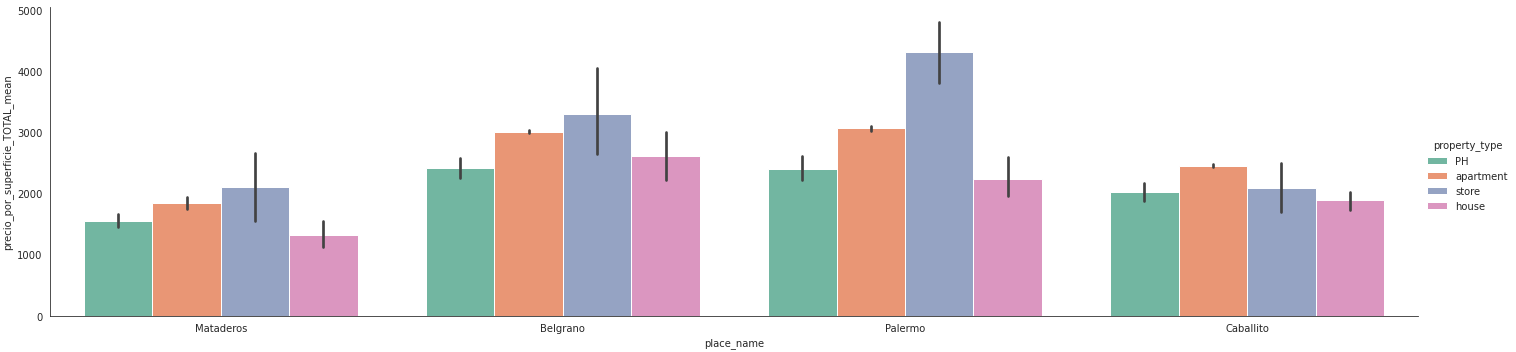

In [265]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="place_name",y='precio_por_superficie_TOTAL_mean', data=grafico, aspect=4.0, kind='bar',
                    hue='property_type')
       
        g.set_ylabels('precio_por_superficie_TOTAL_mean')

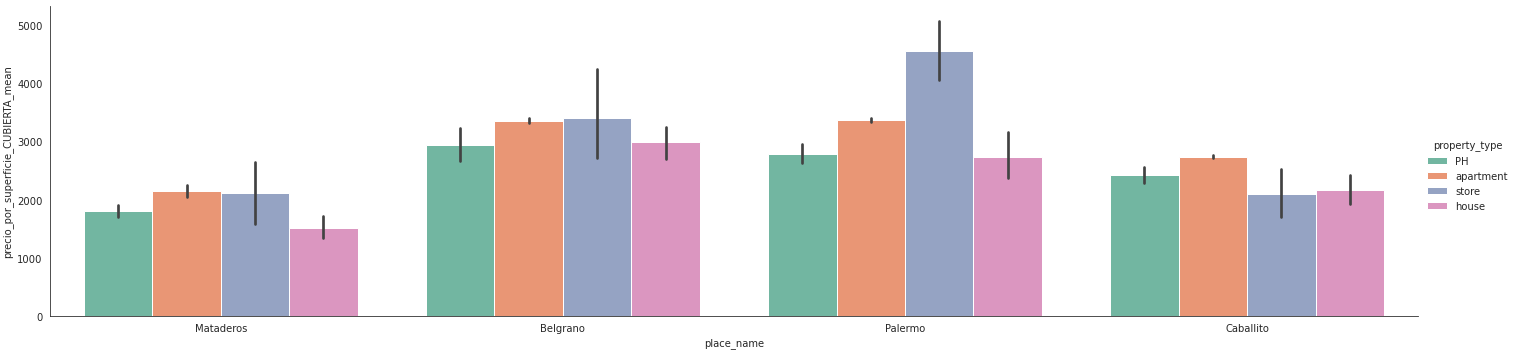

In [269]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="place_name",y='precio_por_superficie_CUBIERTA_mean', data=grafico, aspect=4.0, kind='bar',
                    hue='property_type')
       
        g.set_ylabels('precio_por_superficie_CUBIERTA_mean')

In [ ]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="place_name",y='precio_por_superficie_TOTAL_mean', data=grafico, aspect=4.0, kind='bar',
                    hue='property_type')
       
        g.set_ylabels('precio_por_superficie_CUBIERTA_mean')

In [277]:
data_caba.head(3)

,property_type,place_name,state_name,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,...,price_USD_mean,superficie_TOTAL_mean,superficie_CUBIERTA_mean,precio_por_superficie_TOTAL_mean,precio_por_superficie_CUBIERTA_mean,price_USD_std,superficie_TOTAL_std,superficie_CUBIERTA_std,precio_por_superficie_TOTAL_std,precio_por_superficie_CUBIERTA_std
0,PH,Mataderos,Capital Federal,2 AMBIENTES TIPO CASA PLANTA BAJA PO...,2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,55.0,40.0,1127.272727,1550.000000,...,62000.0,55.0,40.0,1127.272727,1550.000000,0.0,0.0,0.0,0.0,0.0
2,apartment,Mataderos,Capital Federal,2 AMBIENTES 3ER PISO LATERAL LIVING ...,2 AMB 3ER PISO CON ASCENSOR APTO CRE...,72000.0,55.0,55.0,1309.090909,1309.090909,...,72000.0,55.0,55.0,1309.090909,1309.090909,0.0,0.0,0.0,0.0,0.0
7,apartment,Belgrano,Capital Federal,EXCELENTE MONOAMBIENTE A ESTRENAR AM...,JOSE HERNANDEZ 1400 MONOAMBIENTE ES...,138000.0,45.0,40.0,3066.666667,3450.000000,...,138000.0,45.0,40.0,3066.666667,3450.000000,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='precio_por_superficie_TOTAL'>

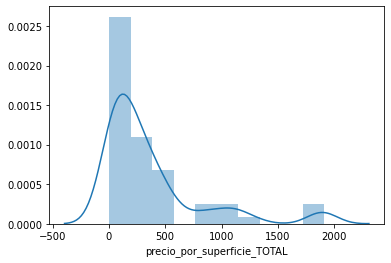

In [238]:
sns.distplot(data_caba.groupby('place_name')['precio_por_superficie_TOTAL'].size())
#sns.distplot(data['y']);